In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.neural_network import MLPClassifier
from sklearn import decomposition


from pandas.tools.plotting import parallel_coordinates

from os import listdir


In [2]:
# Variables
x_train_file = "X_train.txt"
y_train_file = "y_train.txt"

x_test_file = "X_test.txt"
y_test_file = "y_test.txt"

path_to_data = "UCI HAR Dataset" 
path_to_training_data = "/".join([path_to_data, "train"])
path_to_test_data = "/".join([path_to_data, "test"])

features_file = "features.txt"


In [3]:
# Load data into numpy arrays
X_train_np = np.loadtxt(path_to_training_data + "/" + x_train_file)
y_train_np = np.loadtxt(path_to_training_data + "/" + y_train_file)

X_test_np = np.loadtxt(path_to_test_data + "/" + x_test_file)
y_test_np = np.loadtxt(path_to_test_data + "/" + y_test_file)

# Load features list
features_df = pd.read_csv(path_to_data + "/" + features_file, sep = " ", index_col=0, header=None) 
features_df.columns = ["names"]

# Convert to pandas data frame
X_train_df = pd.DataFrame(X_train_np)
y_train_df = pd.DataFrame(y_train_np)
X_test_df = pd.DataFrame(X_test_np)
y_test_df = pd.DataFrame(y_test_np)


# Label Columns
#X_train_df.columns = list(features_df.names.values)
y_train_df.columns = ["labels"]

In [4]:
n_features = X_train_df.shape[1]

In [5]:
X_train = np.array(X_train_df)
y_train = np.array(y_train_df).ravel()

X_test = np.array(X_test_df)
y_test = np.array(y_test_df).ravel()


In [6]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100,), random_state=3)
clf.fit(X_train, y_train)         

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [7]:
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

In [8]:
test_accuracy = sum([y_test[i] == y_test_predict[i] for i in range(len(y_test))])/len(y_test)
train_accuracy = sum([y_train[i] == y_train_predict[i] for i in range(len(y_train))])/len(y_train)

print("Training accuracy : {0:.2f} %".format(train_accuracy*100))
print("Testing accuracy  : {0:.2f} %".format(test_accuracy*100))

Training accuracy : 99.01 %
Testing accuracy  : 94.94 %


In [9]:
from sklearn.ensemble import ExtraTreesClassifier

In [10]:
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [11]:
feat_order_of_importance = feat_importances.sort_values(ascending=False)


In [12]:
feat_order_of_importance = sorted(list(feat_importances.index.values), key=lambda x: -feat_importances.loc[x])

In [25]:
test_accuracy = []
train_accuracy = []
x = []
for n_top_features in range(1,6):
    x.append(n_top_features)
    print(n_top_features)
    X_train_top_features = X_train.T[feat_order_of_importance[:n_top_features]].T
    X_test_top_features = X_test.T[feat_order_of_importance[:n_top_features]].T

    clf_top_features = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(n_top_features), random_state=42)
    clf_top_features.fit(X_train_top_features, y_train)     

    y_train_predict = clf_top_features.predict(X_train_top_features)
    y_test_predict = clf_top_features.predict(X_test_top_features)

    test_accuracy.append(sum([y_test[i] == y_test_predict[i] for i in range(len(y_test))])/len(y_test))
    train_accuracy.append(sum([y_train[i] == y_train_predict[i] for i in range(len(y_train))])/len(y_train))

for n_top_features in range(10,100,10):
    x.append(n_top_features)
    print(n_top_features)
    X_train_top_features = X_train.T[feat_order_of_importance[:n_top_features]].T
    X_test_top_features = X_test.T[feat_order_of_importance[:n_top_features]].T

    clf_top_features = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(n_top_features), random_state=42)
    clf_top_features.fit(X_train_top_features, y_train)     

    y_train_predict = clf_top_features.predict(X_train_top_features)
    y_test_predict = clf_top_features.predict(X_test_top_features)

    test_accuracy.append(sum([y_test[i] == y_test_predict[i] for i in range(len(y_test))])/len(y_test))
    train_accuracy.append(sum([y_train[i] == y_train_predict[i] for i in range(len(y_train))])/len(y_train))

for n_top_features in range(100,151, 50):
    x.append(n_top_features)
    print(n_top_features)
    X_train_top_features = X_train.T[feat_order_of_importance[:n_top_features]].T
    X_test_top_features = X_test.T[feat_order_of_importance[:n_top_features]].T

    clf_top_features = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(n_top_features), random_state=42)
    clf_top_features.fit(X_train_top_features, y_train)     

    y_train_predict = clf_top_features.predict(X_train_top_features)
    y_test_predict = clf_top_features.predict(X_test_top_features)

    test_accuracy.append(sum([y_test[i] == y_test_predict[i] for i in range(len(y_test))])/len(y_test))
    train_accuracy.append(sum([y_train[i] == y_train_predict[i] for i in range(len(y_train))])/len(y_train))



1
2
3
4
5
10
20
30
40
50
60
70
80
90
100
150


1
2
3
4
5
10
20
30
40
50
60
70
80
90
100
150


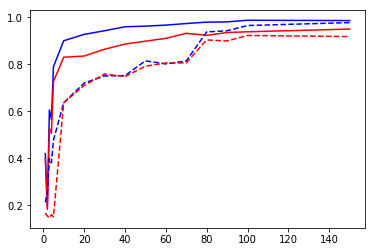

In [45]:
test_accuracy2 = []
train_accuracy2 = []
x = []

shuffle_features = np.random.permutation(list(np.arange(0,X_train.shape[1])))

for n_top_features in range(1,6):
    x.append(n_top_features)
    print(n_top_features)
    X_train_top_features = X_train.T[shuffle_features[:n_top_features]].T
    X_test_top_features = X_train.T[shuffle_features[:n_top_features]].T

    clf_top_features = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(n_top_features), random_state=42)
    clf_top_features.fit(X_train_top_features, y_train)     

    y_train_predict = clf_top_features.predict(X_train_top_features)
    y_test_predict = clf_top_features.predict(X_test_top_features)

    test_accuracy2.append(sum([y_test[i] == y_test_predict[i] for i in range(len(y_test))])/len(y_test))
    train_accuracy2.append(sum([y_train[i] == y_train_predict[i] for i in range(len(y_train))])/len(y_train))

for n_top_features in range(10,100,10):
    x.append(n_top_features)
    print(n_top_features)
    X_train_top_features = X_train.T[shuffle_features[:n_top_features]].T
    X_test_top_features = X_test.T[shuffle_features[:n_top_features]].T

    clf_top_features = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(n_top_features), random_state=42)
    clf_top_features.fit(X_train_top_features, y_train)     

    y_train_predict = clf_top_features.predict(X_train_top_features)
    y_test_predict = clf_top_features.predict(X_test_top_features)

    test_accuracy2.append(sum([y_test[i] == y_test_predict[i] for i in range(len(y_test))])/len(y_test))
    train_accuracy2.append(sum([y_train[i] == y_train_predict[i] for i in range(len(y_train))])/len(y_train))

for n_top_features in range(100,151, 50):
    x.append(n_top_features)
    print(n_top_features)
    X_train_top_features = X_train.T[shuffle_features[:n_top_features]].T
    X_test_top_features = X_test.T[shuffle_features[:n_top_features]].T

    clf_top_features = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(n_top_features), random_state=42)
    clf_top_features.fit(X_train_top_features, y_train)     

    y_train_predict = clf_top_features.predict(X_train_top_features)
    y_test_predict = clf_top_features.predict(X_test_top_features)

    test_accuracy2.append(sum([y_test[i] == y_test_predict[i] for i in range(len(y_test))])/len(y_test))
    train_accuracy2.append(sum([y_train[i] == y_train_predict[i] for i in range(len(y_train))])/len(y_train))

plt.plot(x, train_accuracy, 'b')
plt.plot(x, test_accuracy, 'r')    
plt.plot(x, train_accuracy2, '--b')
plt.plot(x, test_accuracy2, '--r')
#plt.ylim(0.9,1)
plt.show()

In [46]:
train_accuracy[-1]

0.9863982589771491